# Deep Learning with Python 
## Exercises 3.2 - Reuters Dataset

### Preparing workspace

In [2]:
# Importin
from tensorflow.keras.datasets import reuters

# Setting up `numpy` to read in pickle files
import numpy as np

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [30]:
# Importing and configuring matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Function for visualizing training and validation loss for a model from a history object
def visualizeTrainingResults(history, title_str):
    """Accepts a model's `History` object and uses it to plot its loss and accuracy for 
    both training and validation sets."""
    # Extracting data
    val_loss = history['val_loss']; loss = history['loss']
    val_acc = history['val_acc']; acc = history['acc']
    epochs = range(1, len(acc) + 1)
    
    # Plot the loss
    plotTrainingMetric(epochs, loss, val_loss, 'Loss', title_str)
    
    # Plot the accuracy
    plotTrainingMetric(epochs, acc, val_acc, 'Accuracy', title_str)
    

In [33]:
def plotTrainingMetric(epochs, trainingMetric, validationMetric, metricName, modelName):
    plt.figure(); plt.plot(epochs, trainingMetric, 'bo', label='Training')
    plt.plot(epochs, validationMetric, 'b-', label='Validation')
    plt.grid(True); plt.legend(); plt.xlabel('Epochs');
    plt.ylabel(metricName); plt.title(modelName + ' Training vs Validation ' + metricName );
    plt.show()

### Data Preprocessing

In [5]:
# Function to vectorize reviews with one-hot encoding
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for (index, sequence) in enumerate(sequences):
        results[index, sequence] = 1.
    return results

In [6]:
# Vectorizing training and test data
vectorized_training_data = vectorize_sequences(train_data, 10000)
vectorized_test_data = vectorize_sequences(test_data, 10000)

In [7]:
# Using keras' built-in functionality for one-hot encoding of labels
from tensorflow.keras.utils import to_categorical
vectorized_training_labels = to_categorical(train_labels)
vectorized_test_labels = to_categorical(test_labels)

In [13]:
# Train-validation split
val_lim = 1000

# Validation set
x_val = vectorized_training_data[:val_lim]
y_val = vectorized_training_labels[:val_lim]

# Training set
x_train = vectorized_training_data[val_lim:]
y_train = vectorized_training_labels[val_lim:]

## Investigation 1 - 32 Units

In [14]:
from tensorflow.keras import models, layers

# Instantiating a 32 unit model
model32Units = models.Sequential()

# Input
model32Units.add(layers.Dense(units=32, activation='relu', input_shape=(10000,)))

# Hidden
model32Units.add(layers.Dense(units=32, activation='relu'))

# Output probability
model32Units.add(layers.Dense(units=46, activation='softmax'))

In [15]:
# Compile model
model32Units.compile(optimizer='rmsprop', loss='categorical_crossentropy', 
             metrics=['accuracy'])

In [16]:
# Train the model for 9 epochs with batch size of 512
hist32Units = model32Units.fit(x_train, y_train, batch_size=512, epochs=9, 
                              validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/9
7982/7982 [==============================] - 2s 236us/sample - loss: 2.9208 - acc: 0.5008 - val_loss: 2.1367 - val_acc: 0.5930
Epoch 2/9
7982/7982 [==============================] - 1s 180us/sample - loss: 1.8123 - acc: 0.6320 - val_loss: 1.6190 - val_acc: 0.6370
Epoch 3/9
7982/7982 [==============================] - 1s 175us/sample - loss: 1.4133 - acc: 0.6882 - val_loss: 1.3966 - val_acc: 0.6730
Epoch 4/9
7982/7982 [==============================] - 1s 179us/sample - loss: 1.1775 - acc: 0.7449 - val_loss: 1.2701 - val_acc: 0.7080
Epoch 5/9
7982/7982 [==============================] - 1s 180us/sample - loss: 1.0071 - acc: 0.7845 - val_loss: 1.1659 - val_acc: 0.7410
Epoch 6/9
7982/7982 [==============================] - 1s 185us/sample - loss: 0.8648 - acc: 0.8143 - val_loss: 1.0938 - val_acc: 0.7590
Epoch 7/9
7982/7982 [==============================] - 2s 215us/sample - loss: 0.7

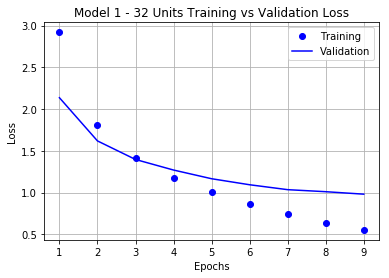

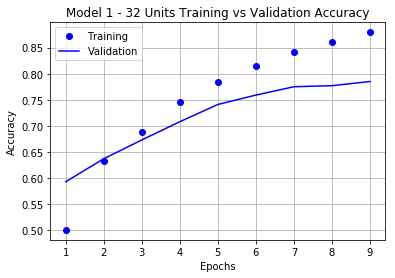

In [34]:
# Plotting the model's training results
visualizeTrainingResults(hist32Units.history, title_str='Model 1 - 32 Units' )

## Investigation 2 - 128 Units

In [36]:
# Instantating model
model_128 = models.Sequential()

# Add layers
model_128.add(layers.Dense(units=128, input_shape=(10000,), activation='relu'))
model_128.add(layers.Dense(units=128, activation='relu'))
model_128.add(layers.Dense(units=46, activation='softmax'))

# Compile
model_128.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
# Training the model and storing its history
model_128_history = model_128.fit(x_train, y_train, batch_size=512, epochs=9, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 328us/sample - loss: 2.2162 - acc: 0.5510 - val_loss: 1.4155 - val_acc: 0.6840
Epoch 2/9
7982/7982 [==============================] - 2s 271us/sample - loss: 1.1475 - acc: 0.7523 - val_loss: 1.1159 - val_acc: 0.7620
Epoch 3/9
7982/7982 [==============================] - 2s 276us/sample - loss: 0.8087 - acc: 0.8279 - val_loss: 0.9721 - val_acc: 0.7950
Epoch 4/9
7982/7982 [==============================] - 2s 271us/sample - loss: 0.5790 - acc: 0.8816 - val_loss: 0.9108 - val_acc: 0.8060
Epoch 5/9
7982/7982 [==============================] - 2s 286us/sample - loss: 0.4288 - acc: 0.9094 - val_loss: 0.8906 - val_acc: 0.8160
Epoch 6/9
7982/7982 [==============================] - 2s 308us/sample - loss: 0.3187 - acc: 0.9310 - val_loss: 0.9096 - val_acc: 0.8100
Epoch 7/9
7982/7982 [==============================] - 3s 360us/sample - loss: 0.2680 - acc: 0.9385 - val_loss: 0.8764 - val_acc: 

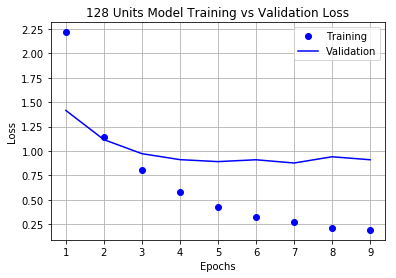

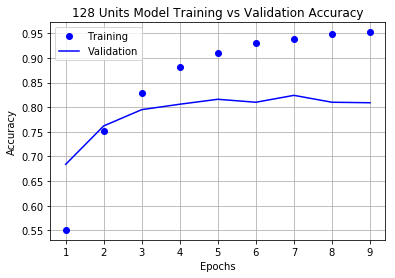

In [38]:
visualizeTrainingResults(history=model_128_history.history, title_str='128 Units Model')

## Investigation 3 - Single Hidden Layer

In [40]:
# Instantiating model with only the input layer and the output layer
model_one_hidden_layer = models.Sequential()
model_one_hidden_layer.add(layers.Dense(units=64, activation='relu', input_shape=(10000,)))
model_one_hidden_layer.add(layers.Dense(units=46, activation='softmax'))

# Compile
model_one_hidden_layer.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
# Train
history_one_hidden_layer = model_one_hidden_layer.fit(x_train, y_train, epochs=9, batch_size=512,
                                                     validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 248us/sample - loss: 2.5810 - acc: 0.5476 - val_loss: 1.7990 - val_acc: 0.6520
Epoch 2/9
7982/7982 [==============================] - 2s 231us/sample - loss: 1.4714 - acc: 0.7240 - val_loss: 1.3497 - val_acc: 0.7280
Epoch 3/9
7982/7982 [==============================] - 2s 224us/sample - loss: 1.0711 - acc: 0.7848 - val_loss: 1.1440 - val_acc: 0.7620
Epoch 4/9
7982/7982 [==============================] - 2s 215us/sample - loss: 0.8355 - acc: 0.8297 - val_loss: 1.0271 - val_acc: 0.7920
Epoch 5/9
7982/7982 [==============================] - 2s 211us/sample - loss: 0.6705 - acc: 0.8695 - val_loss: 0.9504 - val_acc: 0.8110
Epoch 6/9
7982/7982 [==============================] - 2s 213us/sample - loss: 0.5466 - acc: 0.8925 - val_loss: 0.9036 - val_acc: 0.8180
Epoch 7/9
7982/7982 [==============================] - 2s 209us/sample - loss: 0.4483 - acc: 0.9109 - val_loss: 0.8736 - val_acc: 

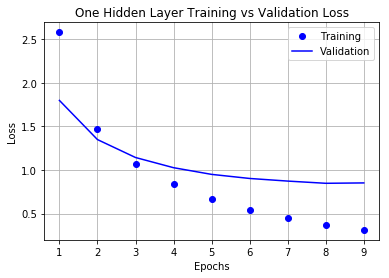

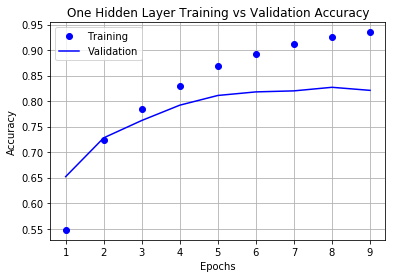

In [46]:
visualizeTrainingResults(history=history_one_hidden_layer.history, title_str='One Hidden Layer')

## Investigation 4 - Three Hidden Layers

In [47]:
# Instantiate
model_4_hidden_layers = models.Sequential()
model_4_hidden_layers.add(layers.Dense(units=64, activation='relu', input_shape=(10000,)))
model_4_hidden_layers.add(layers.Dense(units=64, activation='relu'))
model_4_hidden_layers.add(layers.Dense(units=64, activation='relu'))
model_4_hidden_layers.add(layers.Dense(units=46, activation='softmax'))

# Compile
model_4_hidden_layers.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
# Train
history_4_hidden_layers = model_4_hidden_layers.fit(x_train, y_train, batch_size=512, epochs=9, 
                                                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 267us/sample - loss: 2.6329 - acc: 0.4396 - val_loss: 1.7293 - val_acc: 0.6290
Epoch 2/9
7982/7982 [==============================] - 2s 215us/sample - loss: 1.4343 - acc: 0.6937 - val_loss: 1.3483 - val_acc: 0.7090
Epoch 3/9
7982/7982 [==============================] - 2s 219us/sample - loss: 1.0981 - acc: 0.7637 - val_loss: 1.1983 - val_acc: 0.7280
Epoch 4/9
7982/7982 [==============================] - 2s 213us/sample - loss: 0.8664 - acc: 0.8097 - val_loss: 1.0969 - val_acc: 0.7690
Epoch 5/9
7982/7982 [==============================] - 2s 213us/sample - loss: 0.6899 - acc: 0.8487 - val_loss: 1.0471 - val_acc: 0.7770
Epoch 6/9
7982/7982 [==============================] - 2s 221us/sample - loss: 0.5453 - acc: 0.8826 - val_loss: 1.1181 - val_acc: 0.7530
Epoch 7/9
7982/7982 [==============================] - 2s 223us/sample - loss: 0.4407 - acc: 0.9067 - val_loss: 0.9798 - val_acc: 

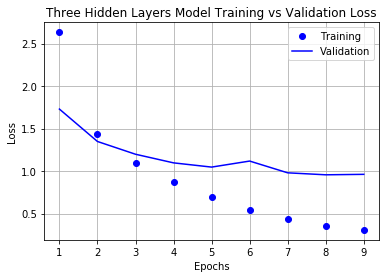

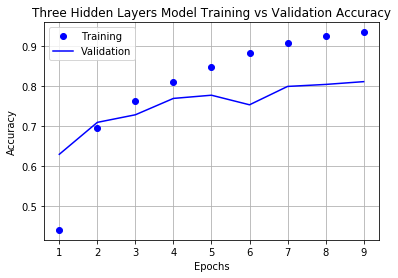

In [49]:
visualizeTrainingResults(history_4_hidden_layers.history, 'Three Hidden Layers Model')

## Comparing Final Results

In [50]:
# Base Model
baseModel = models.Sequential()
baseModel.add(layers.Dense(units=64, activation='relu', input_shape=(10000,)))
baseModel.add(layers.Dense(units=64, activation='relu'))
baseModel.add(layers.Dense(units=46, activation='softmax'))

In [56]:
# Compiling model
baseModel.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
# Training the model
baseModelHistory = baseModel.fit(x_train, y_train, batch_size=512, epochs=9, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 254us/sample - loss: 2.6795 - acc: 0.5051 - val_loss: 1.7678 - val_acc: 0.6300
Epoch 2/9
7982/7982 [==============================] - 2s 209us/sample - loss: 1.4263 - acc: 0.7087 - val_loss: 1.2928 - val_acc: 0.7260
Epoch 3/9
7982/7982 [==============================] - 2s 253us/sample - loss: 1.0348 - acc: 0.7740 - val_loss: 1.1240 - val_acc: 0.7370
Epoch 4/9
7982/7982 [==============================] - 2s 209us/sample - loss: 0.8084 - acc: 0.8251 - val_loss: 0.9954 - val_acc: 0.7780
Epoch 5/9
7982/7982 [==============================] - 2s 211us/sample - loss: 0.6406 - acc: 0.8662 - val_loss: 0.9575 - val_acc: 0.7850
Epoch 6/9
7982/7982 [==============================] - ETA: 0s - loss: 0.5138 - acc: 0.894 - 2s 226us/sample - loss: 0.5101 - acc: 0.8948 - val_loss: 0.9072 - val_acc: 0.8150
Epoch 7/9
7982/7982 [==============================] - 2s 218us/sample - loss: 0.4158 - acc:

In [58]:
# Dictionary of all models to be tested
modelDict = {
    'base model': baseModel, 
    'one hidden layer': model_one_hidden_layer, 
    'three hidden layers': model_4_hidden_layers,
    '32 Activation units': model32Units,
    '128 Activation Units': model_128,
}

In [67]:
# Using model to make predictions on test set 
eval_results = dict()

for modelName, model in modelDict.items():
    print(modelName.upper())
    eval_results[modelName] = model.evaluate(vectorized_test_data, vectorized_test_labels)

BASE MODEL
2246/2246 [==============================] - 0s 206us/sample - loss: 1.0014 - acc: 0.7801
ONE HIDDEN LAYER
2246/2246 [==============================] - 0s 194us/sample - loss: 0.9123 - acc: 0.7952
THREE HIDDEN LAYERS
2246/2246 [==============================] - 0s 200us/sample - loss: 1.0491 - acc: 0.7854
32 ACTIVATION UNITS
2246/2246 [==============================] - 0s 172us/sample - loss: 1.0587 - acc: 0.7605
128 ACTIVATION UNITS
2246/2246 [==============================] - 1s 226us/sample - loss: 1.0363 - acc: 0.7894


In [72]:
eval_results

{'base model': [1.0014174835870866, 0.78005344],
 'one hidden layer': [0.912314324111463, 0.79519147],
 'three hidden layers': [1.0490576288897548, 0.7853963],
 '32 Activation units': [1.0586515396488425, 0.76046306],
 '128 Activation Units': [1.0363250731997264, 0.7894034]}

## Results
- The model with only one hidden layer i.e. a densely connected input layer with 64 units followed by a densely connected softmax layer has the highest accuracy and lowest loss.
- All models improve on the base model's performance in terms of both accuracy and loss.
- The only exception to this is the model with 32 activation units.
- This is because the model with 32 activation units represents a serious information bottleneck - it is difficult to learn all the necessary linear transformations required to map a 10k dimensional vector to a 46 dimension vectory using only 32 hidden layers.
- As a general rule, if the output classes are `n`, always try to aim for at least `n` activation units to prevent information bottlenecks.